# Cartopy

 - [Website](http://scitools.org.uk/cartopy/)

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [83]:
#!wget https://github.com/ocefpaf/python4oceanographers/raw/master/content/downloads/notebooks/data/challenger_path.csv

In [84]:
lon, lat = np.loadtxt('./challenger_path.csv', delimiter=',', unpack=True)

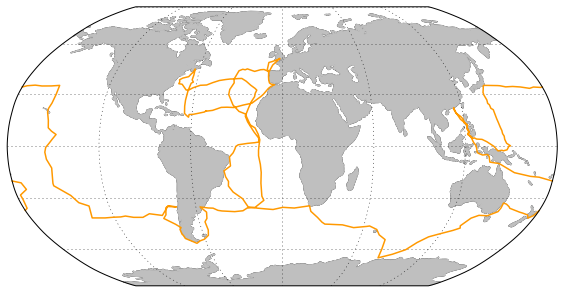

In [85]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution='110m', color='k')
gl = ax.gridlines(draw_labels=False)# Only PlateCarree and Mercator plots are currently supported.
ax.add_feature(cfeature.LAND, facecolor='0.75')
ax.plot(lon, lat, transform=ccrs.Geodetic(), color='#FF9900', linestyle='-', linewidth=1.5);

In [86]:
#!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

In [87]:
from netCDF4 import Dataset
fl = Dataset('air.mon.mean.nc')
air = fl.variables['air'][0,:,:]
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]

In [88]:
from cartopy.util import add_cyclic_point

In [89]:
air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)

<matplotlib.contour.QuadContourSet instance at 0x1101e8d88>

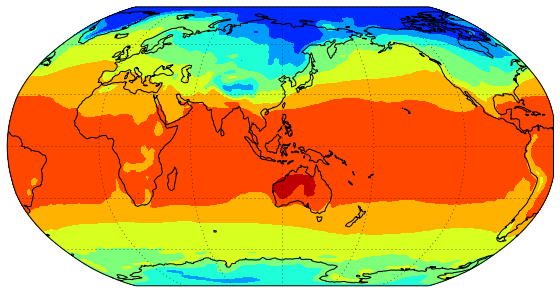

In [91]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=120))
ax.coastlines()
gl = ax.gridlines(draw_labels=False) # Only PlateCarree and Mercator plots are currently supported.
ax.contourf(lon_cyc,lat,air_cyc, transform=ccrs.PlateCarree())

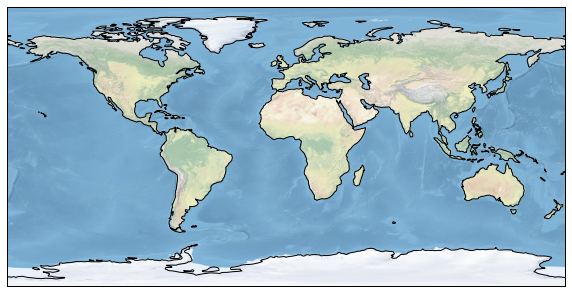

In [95]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

In [96]:
lat = 53.565278
lon = 10.001389

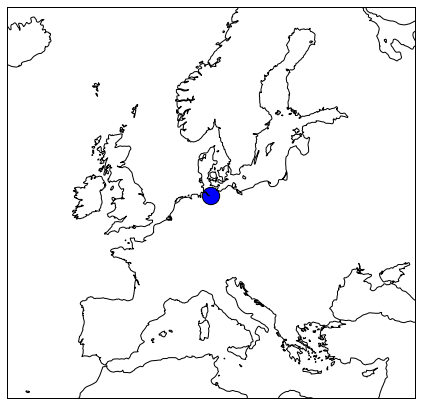

In [100]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m')
ax.scatter(lon,lat,300,transform=ccrs.Geodetic())

In [101]:
import cartopy.feature as cfeature

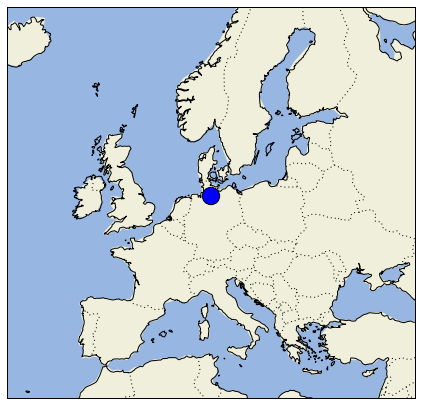

In [102]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m',zorder=9)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.scatter(lon,lat,300,transform=ccrs.Geodetic(),zorder=10)

In [103]:

from cartopy.io.img_tiles import GoogleTiles, OSM,QuadtreeTiles,MapQuestOpenAerial,MapQuestOSM

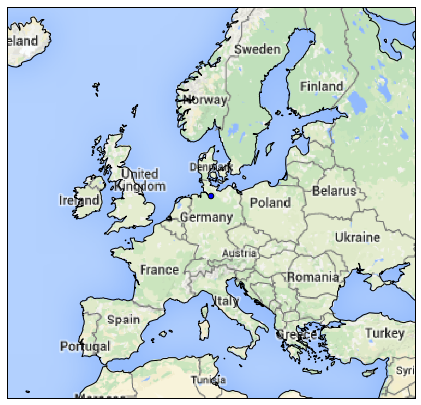

In [104]:

plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m',zorder=9)
ax.scatter(lon,lat,30,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = GoogleTiles()
ax.add_image(gg_tiles, 3)


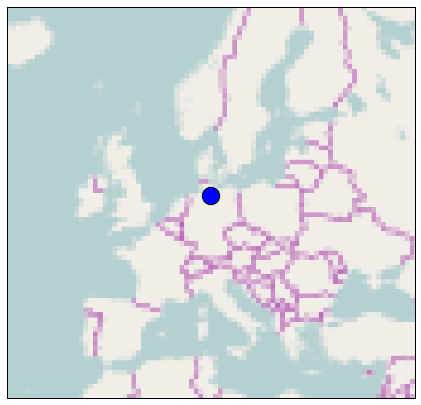

In [108]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.scatter(lon,lat,300,transform=ccrs.Geodetic(),zorder=10)
gg_tiles = OSM()
ax.add_image(gg_tiles,1)

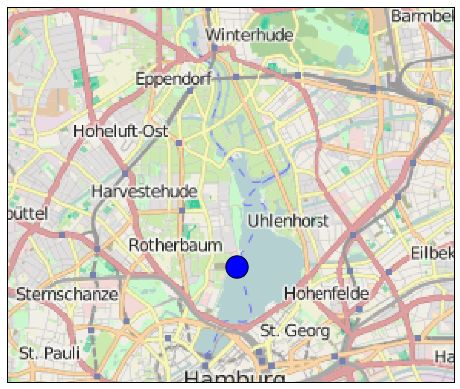

In [106]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([9.95,10.05,53.55,53.6])
ax.scatter(lon,lat,500,transform=ccrs.Geodetic(),zorder=10)
gg_tiles = OSM()
ax.add_image(gg_tiles, 12)

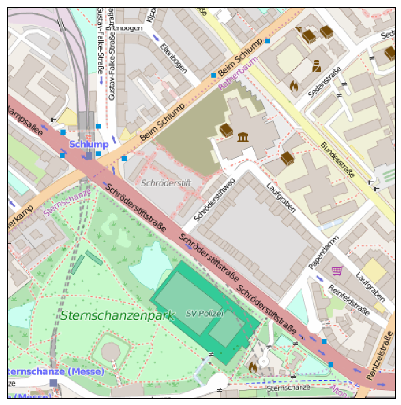

In [107]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([9.968,9.978,53.564,53.57])
gg_tiles = OSM()
ax.add_image(gg_tiles, 16)

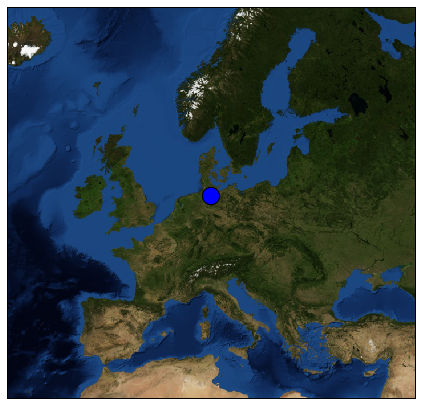

In [109]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.scatter(lon,lat,300,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = MapQuestOpenAerial()
ax.add_image(gg_tiles, 4)

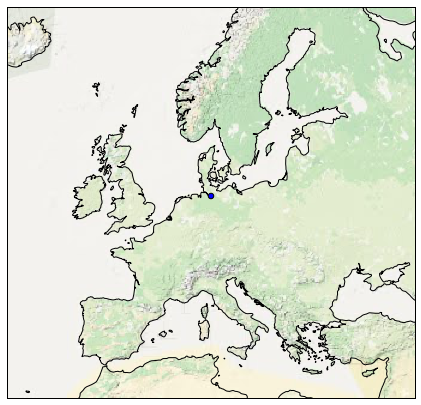

In [110]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m',zorder=9)
ax.scatter(lon,lat,30,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = GoogleTiles(style='terrain')
ax.add_image(gg_tiles, 3)

In [111]:
foro = Dataset('../../data/GLACINDIA_oro.nc')
oro = foro.variables['var129'][0,:,:]
rlat = foro.variables['rlat'][:]
rlon = foro.variables['rlon'][:]

In [112]:
rlon2, rlat2 = np.meshgrid(rlon, rlat)

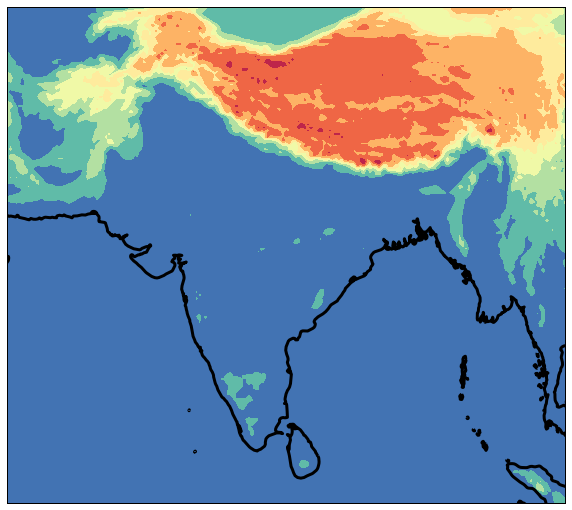

In [114]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34))
ax.contourf(rlon2, rlat2, oro,
                transform=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34),
                cmap=cm.Spectral_r)
ax.coastlines(resolution='50m', lw=3)

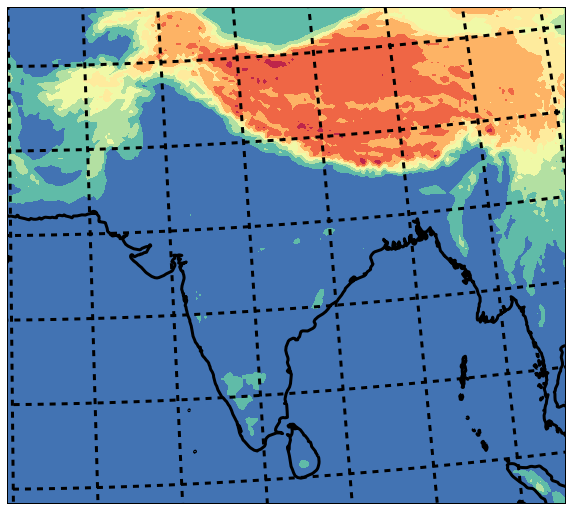

In [151]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34))
mn = ax.contourf(rlon2, rlat2, oro,
                transform=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34),
                cmap=cm.Spectral_r)
ax.coastlines(resolution='50m', lw=3)
gl = ax.gridlines(linewidth=3, linestyle='dashed')


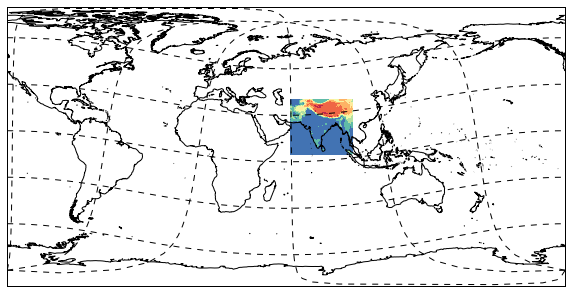

In [116]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34))
ax.contourf(rlon2, rlat2, oro,
                transform=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34),
                cmap=cm.Spectral_r)
ax.coastlines(resolution='50m', lw=1)
gl = ax.gridlines(linewidth=1, linestyle='dashed')
ax.set_global()

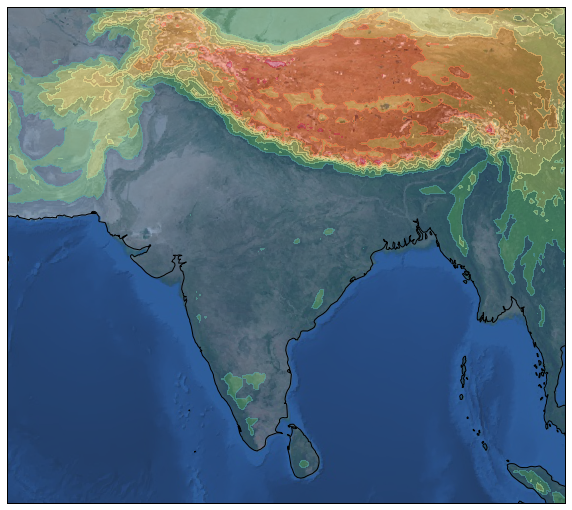

In [119]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34))
ax.contourf(rlon2, rlat2, oro,
                transform=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34),
                cmap=cm.Spectral_r, alpha=0.5)
ax.coastlines(resolution='50m', lw=1)
#gl = ax.gridlines(linewidth=1, linestyle='dashed')
gg_tiles = MapQuestOpenAerial()
ax.add_image(gg_tiles, 4)

#ax.set_global()

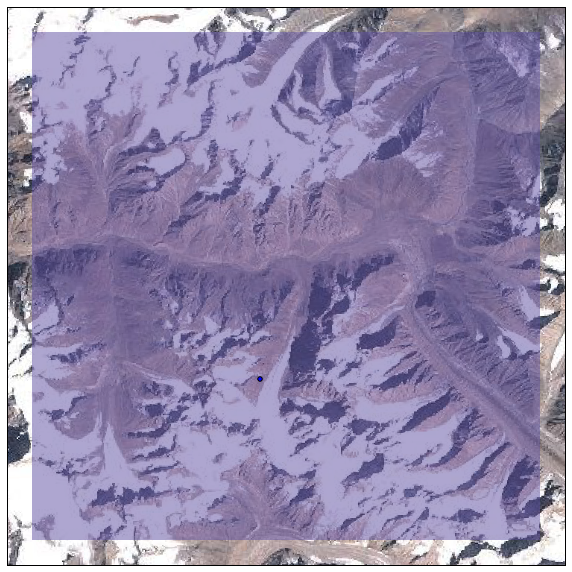

In [121]:
xmin=126
xmax=128
ymin=73
ymax=75
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34))
ax.pcolormesh(rlon2[xmin:xmax,ymin:ymax], rlat2[xmin:xmax,ymin:ymax], oro[xmin:xmax,ymin:ymax],
                transform=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34),
                cmap=cm.Spectral_r, alpha=0.5)
#ax.coastlines(resolution='50m', lw=1)
ax.scatter(77.51,32.24,transform=ccrs.Geodetic() )
#gl = ax.gridlines(linewidth=1, linestyle='dashed')
gg_tiles = MapQuestOpenAerial()
ax.add_image(gg_tiles, 11)

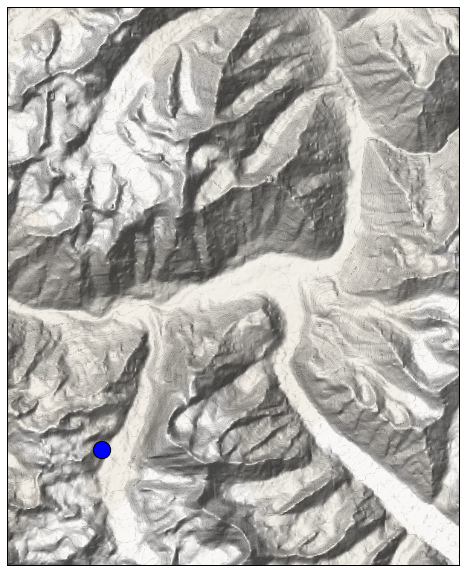

In [123]:
xmin=127
xmax=128
ymin=74
ymax=75
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34))
ax.contourf(rlon2[xmin:xmax,ymin:ymax], rlat2[xmin:xmax,ymin:ymax], oro[xmin:xmax,ymin:ymax],
                transform=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34),
                cmap=cm.Spectral_r, alpha=0.0)
#ax.coastlines(resolution='50m', lw=1)
ax.scatter(77.51,32.24,300, transform=ccrs.Geodetic() )
#gl = ax.gridlines(linewidth=1, linestyle='dashed')
gg_tiles = GoogleTiles(style='terrain')
ax.add_image(gg_tiles, 13)

In [135]:
a = np.load('../prec.npy')
#prec = a.variables['%pre']

In [137]:
a = np.ma.masked_less_equal(a,-99999)

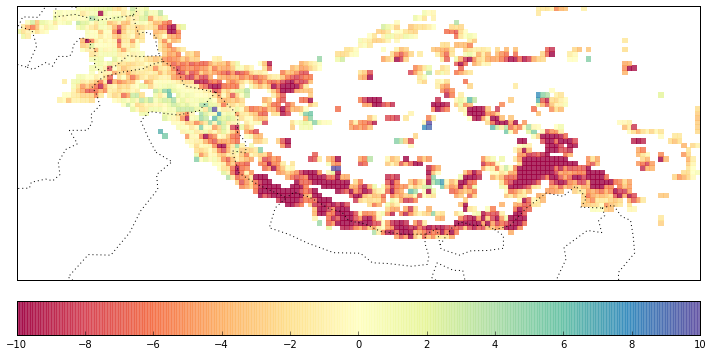

In [167]:
plt.figure(figsize=(10,10))
xmin=100
xmax=161
ymin=30
ymax=181
ax = plt.axes(projection=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34))
mn = ax.pcolormesh(rlon2[xmin:xmax,ymin:ymax],\
              rlat2[xmin:xmax,ymin:ymax],\
              a[xmin:xmax,ymin:ymax],\
              transform=ccrs.RotatedPole(pole_latitude=79.95, pole_longitude=-123.34),\
              cmap=cm.Spectral,\
              alpha=0.8,\
              vmin = -10,\
              vmax = 10,\
                  )
ax.coastlines(resolution='50m', lw=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
#gl = ax.gridlines(linewidth=1, linestyle='dashed')
#gg_tiles = GoogleTiles(style='satellite')
#ax.add_image(gg_tiles, 6)
cb = plt.colorbar(mn, orientation='horizontal',pad=0.03)
plt.tight_layout()
plt.savefig('t.png',dpi=300)

In [164]:
GoogleTiles?